In [1]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

In [2]:
#Step 1. Load the data using pandas.
appdata = pd.read_csv('/Users/priya/Pravat/Simplilearn Data Analytics/Class2/project/googleplaystore.csv')
appdata.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
appdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
appdata.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
#Step 2. Check for null values in the data. Get the number of null values for each column.
appdata.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
#Step 3. Drop records with nulls in any of the columns.
appdata.dropna(axis = 0, inplace=True)

In [7]:
#verify
appdata.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [8]:
appdata.shape

(9360, 13)

In [9]:
#Step 4. Fix incorrect type and inconsistent formatting.
appdata['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 9360, dtype: object

In [10]:
appdata['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [11]:
#Format Size coloumn
appdata['Size'] = appdata.Size.replace('Varies with device','0k')
appdata['Size'] = appdata.Size.str.replace('M','000')
appdata['Size'] = appdata.Size.str.replace('k','')
appdata['Size'] = appdata.Size.replace('1,000+',1000)
appdata['Size'] = appdata['Size'].astype(float)

In [12]:
#verify
appdata['Size'].dtype           

dtype('float64')

In [13]:
#verify
appdata['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10834        2.6
10836    53000.0
10837        3.6
10839        0.0
10840    19000.0
Name: Size, Length: 9360, dtype: float64

In [14]:
#change datatype for Reviews column to float
appdata['Reviews']= appdata['Reviews'].astype(float)

In [15]:
#Check Installs coloumn
appdata['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [16]:
#Format Installs coloumn
appdata['Installs'] = appdata.Installs.str.replace(',','')
appdata['Installs'] = appdata.Installs.str.replace('+','')
appdata['Installs'] = appdata.Installs.str.replace('Free','')
appdata['Installs'] = appdata['Installs'].astype(float)
appdata['Installs'] = appdata['Installs'].astype(float)

In [17]:
#verify data type for the coloumn
appdata['Installs'].dtype

dtype('float64')

In [18]:
appdata.Installs

0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10834         500.0
10836        5000.0
10837         100.0
10839        1000.0
10840    10000000.0
Name: Installs, Length: 9360, dtype: float64

In [19]:
#Check Price coloumn
appdata['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [20]:
#Format Price coloumn
appdata['Price'] = appdata.Price.str.replace('$','').astype(float)

In [21]:
#verify
appdata['Price'].dtype

dtype('float64')

In [22]:
appdata.Price

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10834    0.0
10836    0.0
10837    0.0
10839    0.0
10840    0.0
Name: Price, Length: 9360, dtype: float64

In [23]:
#Step 5. Sanity checks: 
# all ratings are between 1 to 5
appdata['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [24]:
appdata['Rating'].dtype

dtype('float64')

In [25]:
# drop all rows with Ratings outside the 1-5 range
RatingOut = appdata[(appdata['Rating'] < 0) & (appdata['Rating'] > 5)].index
appdata.drop(RatingOut , inplace = True)

In [26]:
#verify the rows and coloumns
appdata.shape 

(9360, 13)

In [27]:
#Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.
appdata = appdata[appdata['Reviews'] <= appdata['Installs']]

In [28]:
#verify the rows and coloumns after drop
appdata.shape

(9353, 13)

In [29]:
#For free apps (type = “Free”), the price should not be >0. Drop any such rows.
#get indexes where free Types have a price over 0
priceindexOut = appdata[(appdata['Price'] >= 0.1) & (appdata['Type'] == 'Free')].index
# drop these row 
appdata.drop(priceindexOut ,inplace = True)

In [30]:
#verify after drop
appdata.shape

(9353, 13)

In [31]:
#Step 6. Performing univariate analysis:
#find possible outliers in Price colomns and Review columns using Box Plot

In [32]:
appdata['Price'].describe()

count    9353.000000
mean        0.961467
std        15.827539
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

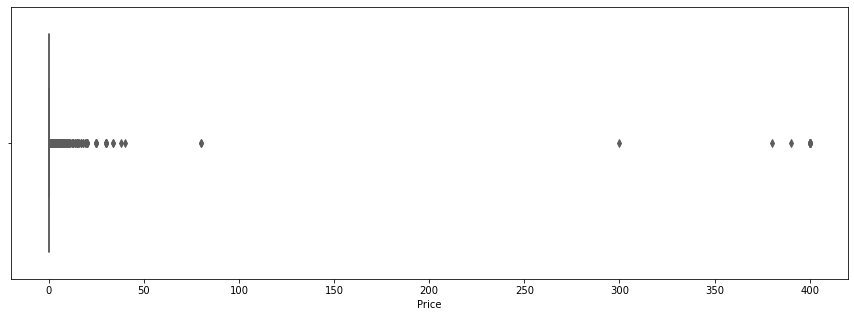

In [33]:
#Boxplot for Price
plt.figure(figsize= (15, 5))
sns.boxplot(x = appdata.Price, color = 'mediumaquamarine',)
plt.show()

- From the statistical analysis table and price box plot it is observed that apps over $100 are outliers.

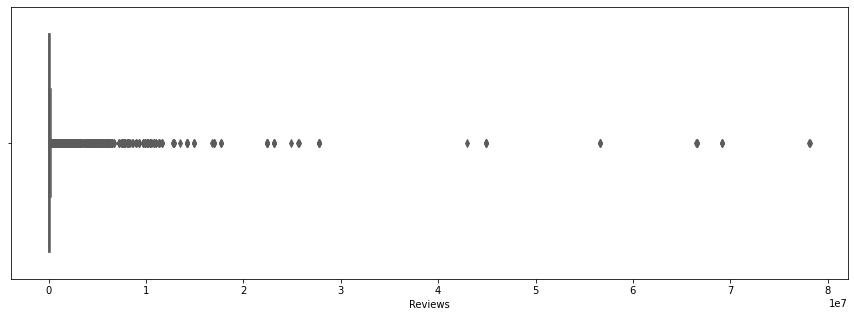

In [34]:
#Boxplot for Review
plt.figure(figsize= (15, 5))
sns.boxplot(x = appdata.Reviews, color = 'mediumaquamarine',)
plt.show()

In [35]:
appdata['Reviews'].describe()

count    9.353000e+03
mean     5.147606e+05
std      3.146169e+06
min      1.000000e+00
25%      1.870000e+02
50%      5.967000e+03
75%      8.174700e+04
max      7.815831e+07
Name: Reviews, dtype: float64

- From the statistcial analysis table and box plot, it is observed that the averge number of reviews are 5,14,760 with a standard deviation of 31,46,169 between values. This deviation is due to several outliers in reviews column.

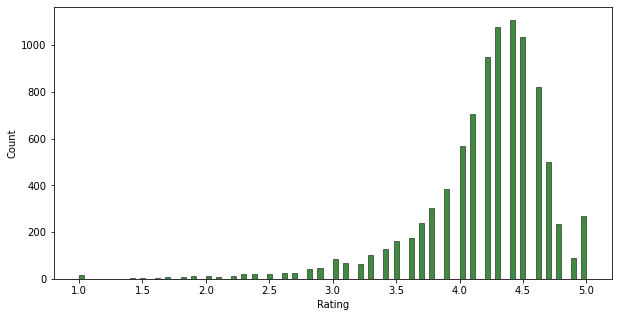

In [36]:
#Histogram for Rating
plt.figure(figsize= (10,5))
sns.histplot(appdata.Rating, bins = 100, color =  'darkgreen', edgecolor = 'black')
plt.show()

- From the rating histogram it is observed that most apps lean/skewed towards high ratings.

<Figure size 720x360 with 0 Axes>

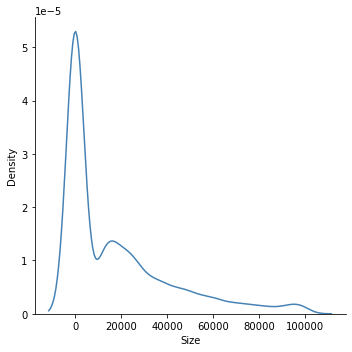

In [37]:
#Histogram for Size
plt.figure(figsize= (10,5))
sns.displot(appdata.Size, kind = 'kde', color= 'steelblue')
plt.show()

- From the size displot histogram, it is observed that most apps size are below 20,000 kb.

In [38]:
#Step 7. Outlier treatment:

In [39]:
#drop Price rows which are above 200
appdata = appdata[appdata['Price'] < 200]
#verify
appdata.shape

(9338, 13)

In [40]:
#Drop Review rows with over 2 million reviews
appdata = appdata[appdata['Reviews'] <= 2000000]
#verify
appdata.shape

(8885, 13)

In [41]:
#Apps having very high number of installs should be dropped from the analysis so drop rows with 100,000,000 and more Installs
appdata = appdata[appdata['Installs'] <= 100000000]
#verify
appdata.shape

(8865, 13)

In [42]:
#Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99
percentiles = appdata[['Rating','Reviews','Size','Installs','Price']]

In [43]:
#10, 25, 50, 70, 90, 95, 99 percentiles
print("10th percentile : ",
       np.percentile(percentiles, 10))
print("25th percentile : ",
       np.percentile(percentiles, 25))
print("50th percentile : ", 
       np.percentile(percentiles, 50))
print("70th percentile : ",
       np.percentile(percentiles, 70))
print("90th percentile : ",
       np.percentile(percentiles, 90))
print("95th percentile : ",
       np.percentile(percentiles, 95))
print("99th percentile  : ",
       np.percentile(percentiles, 99))

10th percentile :  0.0
25th percentile :  2.99
50th percentile :  8.5
70th percentile :  14000.0
90th percentile :  549517.5999999993
95th percentile :  5000000.0
99th percentile  :  10000000.0


<AxesSubplot:>

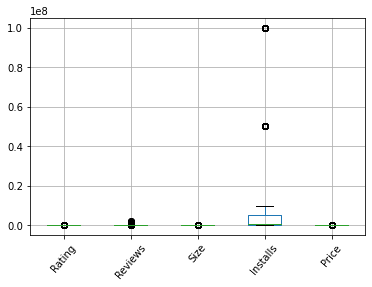

In [44]:
#find out remining outliers with boxplots 
percentiles.boxplot(rot = 50)

<AxesSubplot:>

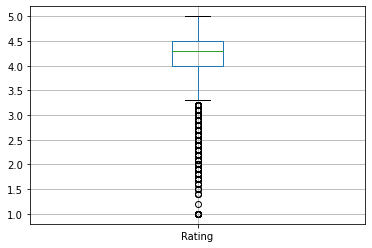

In [45]:
#zoomed into Rating box plot to find out outliers
percentiles.boxplot(column=['Rating'])

In [46]:
#remove outliers from Ratings
RatingOut1 = appdata[(appdata['Rating'] < 3.5) ].index
appdata.drop(RatingOut1 , inplace = True)

In [47]:
appdata.shape

(8134, 13)

<AxesSubplot:>

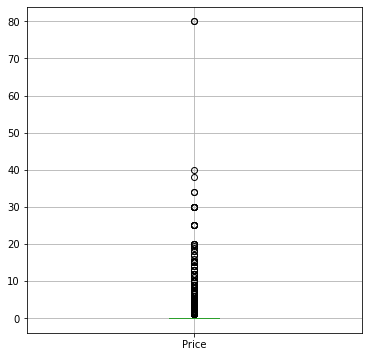

In [48]:
#zoomed into outliers from price coloumn
percentiles.boxplot(column = ['Price'], figsize = (6,6))

In [49]:
#remove outliers from price coloumn, anything above $40 seems outliers
PriceOut = appdata[(appdata['Price'] > 40)].index
appdata.drop(PriceOut , inplace = True)
#verify
appdata.shape

(8132, 13)

<AxesSubplot:>

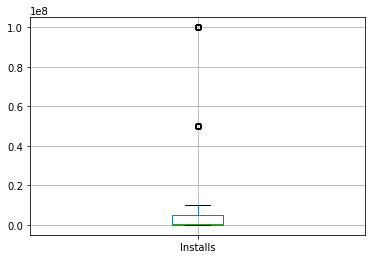

In [50]:
#zoomed into outliers in Installs coloumn
percentiles.boxplot(column = ['Installs'])

In [51]:
#remove outliers from Installs coloumns
Installsout = appdata[(appdata['Installs'] >= 100000000)].index
appdata.drop(Installsout , inplace = True)
#verify
appdata.shape

(8010, 13)

<AxesSubplot:xlabel='Rating', ylabel='Price'>

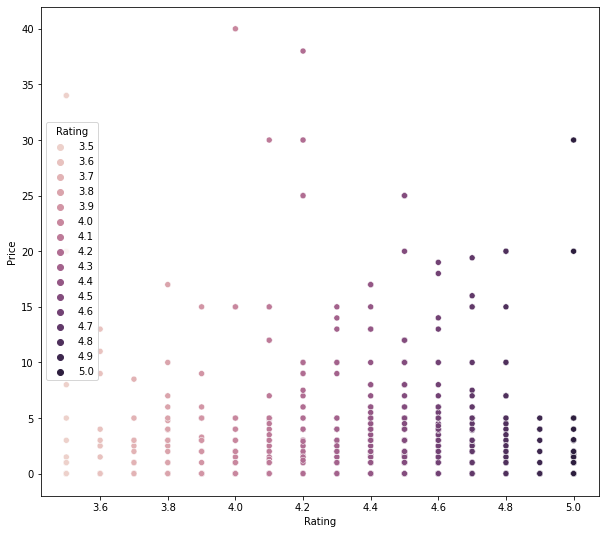

In [52]:
#Step 8. Bivariate analysis
#Scatter plot for Rating vs. Price
plt.figure(figsize=(10, 9))
sns.scatterplot(
    data=appdata, x="Rating", y="Price", hue="Rating",
    sizes=(20, 200),  legend="full")

observation in Rating vs Price:
- Most Ratings for the apps are with in 4.4 to 5.0 and apps Prices are between 0 and $10. It is also observed that higher Price apps does not mean better ratings.

<AxesSubplot:xlabel='Rating', ylabel='Reviews'>

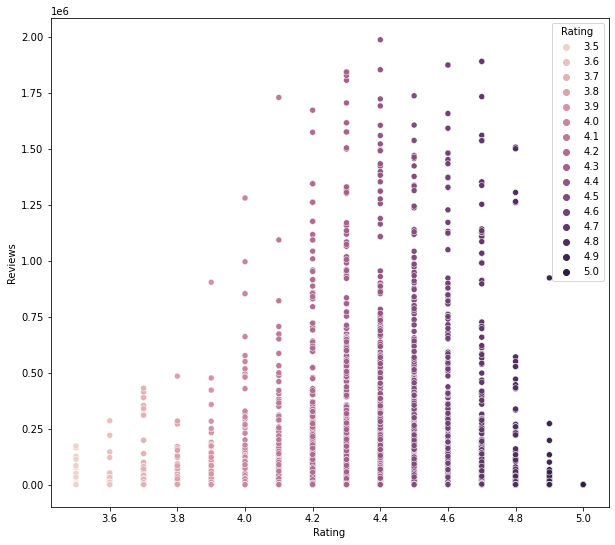

In [53]:
#Scatter plot for Rating vs. Reviews
plt.figure(figsize=(10, 9))
sns.scatterplot(
    data=appdata, x="Rating", y="Reviews", hue="Rating",
    sizes=(20, 200), legend="full")

Observation in Rating vs Reviews:
- Better ratings apps have most reviews although not everytime is the case.

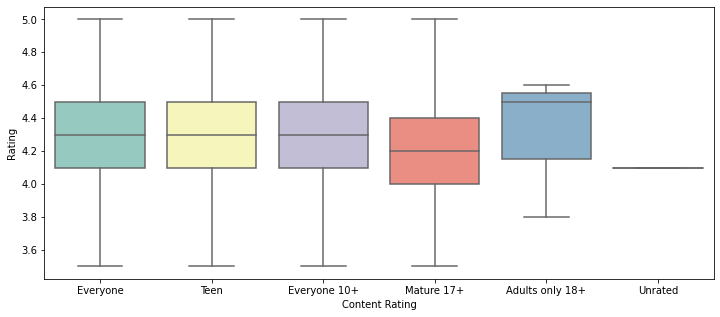

In [54]:
#Box plot for Rating vs. Content Rating
plt.figure(figsize=(12, 5))
rvcr = sns.boxplot(data = appdata,x ='Content Rating', y ='Rating', palette ='Set3')

Observation in Rating vs Content Ratings:
- From the box plot, there does not seem to be much difference between Content Ratings in relation to Ratings.

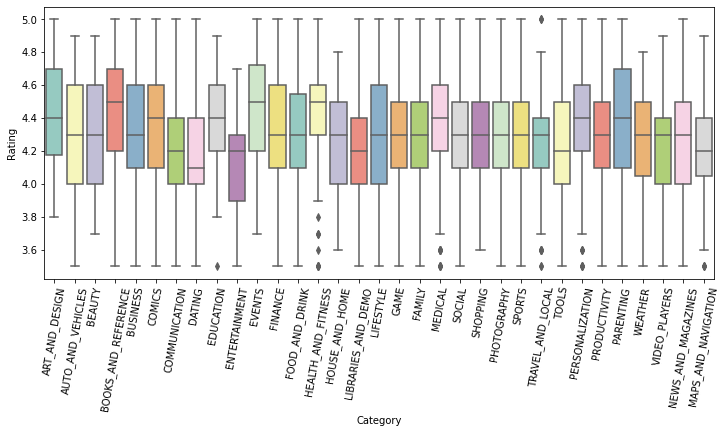

In [55]:
#Box plot for Rating vs. Category
plt.figure(figsize=(12, 5))
rvca = sns.boxplot(data = appdata,x ='Category', y ='Rating', palette ='Set3')
plt.show(plt.setp(rvca.get_xticklabels(), rotation = 80))

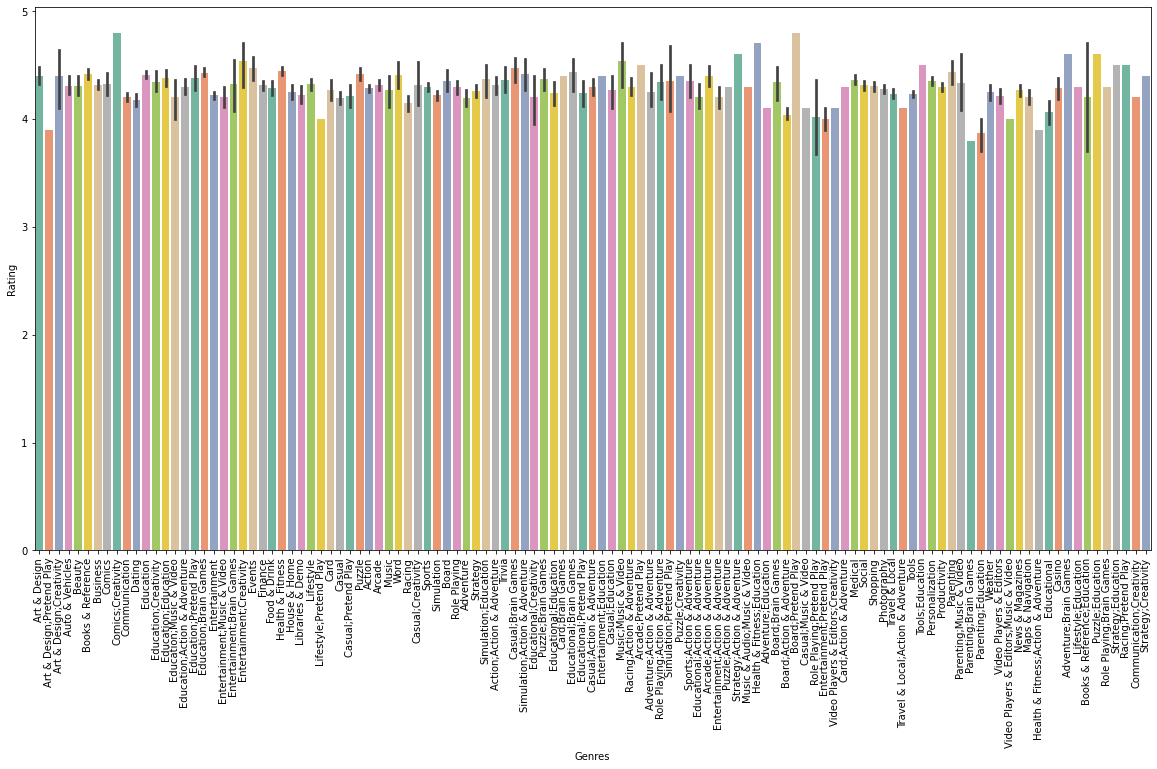

In [56]:
#categorical data in relation to Genres
plt.figure(figsize=(20, 10))
cgen = sns.barplot(data = appdata, x ='Genres', y ='Rating', palette ='Set2') 
plt.show (plt.setp(cgen.get_xticklabels(), rotation=90))

 Box plot for Rating vs. Genres
- Comics;Creativity and Board Pretend Play has rate best ratings.

In [57]:
#Step 9.Data preprocessing

In [58]:
inp1 = appdata.copy()

In [59]:
inp1.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [60]:
inp1.describe()

,Rating,Reviews,Size,Installs,Price
count,8010.000000,8.010000e+03,8010.000000,8.010000e+03,8010.000000
mean,4.294931,9.734010e+04,17388.392559,3.755792e+06,0.334087
std,0.335667,2.408202e+05,23634.134319,8.968026e+06,1.866648
min,3.500000,1.000000e+00,0.000000,5.000000e+00,0.000000
25%,4.100000,2.110000e+02,3.300000,1.000000e+04,0.000000
50%,4.300000,6.030500e+03,861.500000,5.000000e+05,0.000000
75%,4.500000,6.122275e+04,27000.000000,5.000000e+06,0.000000
max,5.000000,1.986068e+06,100000.000000,5.000000e+07,39.990000


In [61]:
# Apply log transformation to reduce the skew in Reviews and Installs.
inp1.Reviews = np.log1p(inp1.Reviews.values)
inp1.Installs = np.log1p(inp1.Installs.values)

In [62]:
#verify after apply log transformation.
inp1.describe()

,Rating,Reviews,Size,Installs,Price
count,8010.000000,8010.000000,8010.000000,8010.000000,8010.000000
mean,4.294931,8.192454,17388.392559,12.088349,0.334087
std,0.335667,3.489351,23634.134319,3.526139,1.866648
min,3.500000,0.693147,0.000000,1.791759,0.000000
25%,4.100000,5.356586,3.300000,9.210440,0.000000
50%,4.300000,8.704751,861.500000,13.122365,0.000000
75%,4.500000,11.022290,27000.000000,15.424949,0.000000
max,5.000000,14.501668,100000.000000,17.727534,39.990000


In [63]:
#Drop columns App, Last Updated, Current Ver, and Android Ver.
inp1 = inp1.drop(['App', 'Last Updated', 'Current Ver', 'Android Ver'], axis = 1)

In [64]:
#verify
inp1.head(2)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play


In [65]:
## convert the object type variable and convert them to dumies 
inp2 = pd.get_dummies(inp1, columns = ['Category','Type','Content Rating','Genres'])

In [66]:
inp2

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.1,5.075174,19000.0,9.210440,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8.7,15.424949,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,12.281389,25000.0,17.727534,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2.8,11.512935,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,4.0,2.079442,2.6,6.216606,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10836,4.5,3.663562,53000.0,8.517393,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,5.0,1.609438,3.6,4.615121,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10839,4.5,4.744932,0.0,6.908755,0.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
#Step 10. Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test
df_train, df_test = split(inp2, test_size = 0.30, random_state = 12)

In [68]:
df_train.shape

(5607, 161)

In [69]:
df_test.shape

(2403, 161)

In [70]:
#Step 11. Model bulding
lm = LinearRegression()

In [71]:
# fit the model 
X = df_train.drop(columns=['Rating'])
Y = df_train.Rating
lm = lm.fit(X,Y)

In [72]:
lm.coef_

array([ 1.25377279e-01, -1.96994216e-07, -1.29919784e-01, -6.73259942e-03,
        2.85896314e-01,  1.20982219e-02,  2.21857947e-02,  4.39740520e-02,
       -5.12960310e-03,  1.74879339e-01, -6.09064501e-02, -5.90037866e-02,
       -4.08333449e-02, -1.25718155e-01,  8.03342238e-02, -3.62643100e-02,
       -1.43024208e-02, -3.86428067e-03,  1.61136374e-01,  4.89036100e-02,
       -1.87843171e-02, -4.08525665e-02, -7.95022343e-02, -7.80563309e-02,
        1.67663827e-02, -2.53218613e-02, -5.27299070e-02,  1.25476805e-03,
       -5.56277442e-03, -1.56147917e-02, -6.96197399e-03, -1.64395714e-02,
       -9.36158870e-04, -3.75960020e-02, -6.69146404e-02, -3.62807411e-02,
       -1.98528581e-02,  2.58650111e-02, -2.58650111e-02,  1.71864220e-01,
        2.41072631e-02, -1.27049668e-02, -1.30084282e-02, -4.64355218e-03,
       -1.65614536e-01, -2.20725433e-01,  3.40191251e-02, -3.42138163e-01,
       -5.40113359e-02,  2.08143226e-01, -2.10932826e-01, -1.55038241e-01,
        7.39169510e-02,  

In [73]:
lm.intercept_

4.8330797658206865

In [74]:
lm.score(X,Y)  # R squared value for the df_train data

0.2094384482453281

In [75]:
#ycap that is prediction for the df_train data 
ycap = lm.predict(X)
print(ycap)

[4.53689204 4.32417326 4.27046062 ... 4.34424434 4.28856167 4.27971385]


In [76]:
#Step 12. Make predictions for df_test data
df_test_x = df_test.drop(columns = ['Rating'])

In [77]:
y_pred = lm.predict(df_test_x)
print (y_pred)

[4.42758805 4.23124602 4.1869629  ... 4.16990709 4.20954689 4.17562067]


In [78]:
mse(y_true = df_test.Rating, y_pred = y_pred, squared = False) #MSE value for df_test data

0.3055338383580272